In [ ]:
%matplotlib inline
import pylab as plt
from firecrown.likelihood.likelihood import load_likelihood
from firecrown.likelihood.likelihood import load_likelihood_from_module_type
from firecrown.parameters import ParamsMap
import numpy as np
import sacc
import pathlib
import pyccl as ccl
from firecrown.modeling_tools import ModelingTools
import firecrown
import sys
import os
import inspect
from copy import deepcopy
# we need to import a firecrown example likelihood:
# exports the path to the environment variable FIRECROWN_DIR
os.environ["FIRECROWN_DIR"] = os.path.dirname('/Users/loureiro/Work/Github/firecrown/')

In [2]:
# importing the example likelihood module from the firecrown examples
sys.path.append(os.path.join(os.environ["FIRECROWN_DIR"], "examples", "des_y1_3x2pt"))
# trying to import the example likelihood
import factory as des_y1_3x2pt_PT

In [3]:
sys.path.append('../src/smokescreen/')
from smokescreen import ConcealDataVector

In [8]:
# ccl cosmology
cosmo = ccl.Cosmology(Omega_c=0.27, 
                      Omega_b=0.045, 
                      h=0.67, 
                      sigma8=0.82, 
                      n_s=0.96, 
                      transfer_function='bbks')
sacc_data = sacc.Sacc.load_fits('/Users/loureiro/Work/Github/firecrown/examples/des_y1_3x2pt/sacc_data.fits')

# FIXME: not sure there's another way of setting this from the likelihood
syst_dict = {
            "ia_a_1": 1.0,
            "ia_a_2": 0.5,
            "ia_a_d": 0.5,
            "lens0_bias": 2.0,
            "lens0_b_2": 1.0,
            "lens0_b_s": 1.0,
            "lens0_mag_bias": 1.0,
            "src0_delta_z": 0.000,
            "lens0_delta_z": 0.000,}

/opt/homebrew/Caskroom/miniforge/base/envs/desc_smokescreen/lib/python3.13/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(


## Deterministic Shift

In [9]:
smkscr = ConcealDataVector(cosmo, des_y1_3x2pt_PT, {'Omega_c': 0.35, 'sigma8': 0.5}, sacc_data, systm_dict=None, **{'debug': True})

[DEBUG] Shifts: {'Omega_c': 0.35, 'sigma8': 0.5}
[DEBUG] Concealed Cosmology: <pyccl.cosmology.Cosmology>
	Neff    = 3.044
	Omega_b = 0.045
	Omega_c = 0.35
	h       = 0.67
	n_s     = 0.96
	sigma8  = 0.5
	transfer_function = bbks
	extra_parameters =
	HASH_ACCURACY_PARAMS = 0x858e96cc551f22c


/opt/homebrew/Caskroom/miniforge/base/envs/desc_smokescreen/lib/python3.13/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(


In [6]:
smkscr.calculate_concealing_factor()

ValueError: Set either A_s or sigma8 but not both.

In [10]:
smkscr.apply_concealing_to_likelihood_datavec()

array([-2.64949353e-06, -5.50163002e-06, -5.67128840e-06, -1.15667406e-06,
       -2.18521417e-06, -2.74779944e-06, -2.75470327e-06, -2.34507703e-06,
       -9.47123021e-07, -3.31199571e-07, -1.01216016e-06, -1.00945953e-06,
       -6.28376992e-07, -6.42610078e-07, -5.08973872e-07, -1.03292394e-05,
       -6.31847669e-06, -4.85092238e-06, -3.37479445e-06, -1.04544441e-06,
       -2.88708255e-06, -4.48332778e-06, -2.45512835e-06, -2.22553458e-06,
       -1.70005385e-06, -1.20759650e-06, -1.08694326e-06, -1.06921852e-06,
       -7.36936852e-07, -7.49146384e-07, -1.43529191e-05, -1.28837079e-05,
       -6.76863543e-06, -7.92395997e-06, -8.89782037e-06, -4.81461353e-06,
       -3.36726786e-06, -4.48356895e-06, -1.73009496e-06, -2.26489546e-06,
       -2.00798708e-06, -1.89879096e-06, -1.47054179e-06, -9.36039565e-07,
       -9.28430625e-07, -6.57914188e-07, -2.49921947e-05, -1.71198118e-05,
       -7.00907787e-06, -6.92754392e-06, -6.23684390e-06, -6.90312566e-06,
       -3.96726576e-06, -

In [11]:
smkscr.save_concealed_datavector("./", "test")

In [24]:
def modify_default_params(default_params, ccl_cosmology, systematics=None):
    for key, value in default_params.items():
        if key in ccl_cosmology:
            default_params[key] = ccl_cosmology[key]
        elif systematics is not None and key in systematics:
            default_params[key] = systematics[key]
    return default_params

In [ ]:
from firecrown.updatable import get_default_params_map
from firecrown.ccl_factory import PoweSpecAmplitudeParameter
#smkscr.tools.update(ParamsMap(smkscr.cosmo.to_dict()))

params = get_default_params_map(smkscr.tools, smkscr.likelihood)
print(params, type(params))
# remove sigma8 from dictionary and add A_s as a test

print(params['sigma8'])

{'Omega_c': 0.25, 'lens0_bias': 1.5, 'src2_delta_z': 0.0, 'n_s': 0.96, 'alphaz': 0.0, 'h': 0.67, 'lens2_bias': 1.5, 'lens0_delta_z': 0.0, 'lens2_delta_z': 0.0, 'ia_bias': 0.5, 'm_nu': [], 'src2_mult_bias': 1.0, 'sigma8': 0.81, 'lens1_delta_z': 0.0, 'src1_mult_bias': 1.0, 'lens3_bias': 1.5, 'lens4_delta_z': 0.0, 'Neff': 3.044, 'T_CMB': 2.7255, 'lens3_delta_z': 0.0, 'z_piv': 0.5, 'lens4_bias': 1.5, 'src0_mult_bias': 1.0, 'src1_delta_z': 0.0, 'wa': 0.0, 'w0': -1.0, 'src3_mult_bias': 1.0, 'src0_delta_z': 0.0, 'lens1_bias': 1.5, 'src3_delta_z': 0.0, 'Omega_b': 0.05, 'Omega_k': 0.0} <class 'firecrown.parameters.ParamsMap'>
0.81


In [17]:
print(smkscr.tools.ccl_factory.amplitude_parameter)

PoweSpecAmplitudeParameter.SIGMA8


In [26]:
fc_params1 = modify_default_params(params, smkscr.cosmo.to_dict(), smkscr.systematics_dict)

In [27]:
smkscr.tools.update(fc_params1)

In [28]:
smkscr.tools.prepare()

In [29]:
smkscr.likelihood.update(fc_params1)
smkscr.likelihood.compute_theory_vector(smkscr.tools)

array([ 2.61780797e-05,  2.09906635e-05,  1.67893087e-05,  1.34605470e-05,
        1.08539935e-05,  8.79511735e-06,  7.15279351e-06,  5.80874127e-06,
        4.68936900e-06,  3.74392414e-06,  2.94015233e-06,  2.25979716e-06,
        1.69155262e-06,  1.22664828e-06,  8.56856576e-07,  3.50340505e-05,
        2.81011778e-05,  2.25415003e-05,  1.81572652e-05,  1.47162628e-05,
        1.19699610e-05,  9.74888642e-06,  7.90515346e-06,  6.34997765e-06,
        5.02864729e-06,  3.90566298e-06,  2.95992511e-06,  2.17956544e-06,
        1.54952639e-06,  1.05846804e-06,  5.47445657e-05,  4.39724405e-05,
        3.53172705e-05,  2.84070166e-05,  2.29583933e-05,  1.86632108e-05,
        1.52095591e-05,  1.23888739e-05,  1.00177948e-05,  8.01142378e-06,
        6.29936056e-06,  4.84786856e-06,  3.63383202e-06,  2.64109515e-06,
        1.84925713e-06,  1.24171983e-06,  5.95193058e-05,  4.78421956e-05,
        3.84759592e-05,  3.09899762e-05,  2.50715894e-05,  2.03901137e-05,
        1.66028087e-05,  

In [24]:
smkscr.calculate_concealing_factor()
#blinded_dv = smkscr.apply_blinding_to_likelihood_datavec()

[DEBUG]


MissingSamplerParameterError: The parameter `Omega_c` is required to update something in this likelihood.
It should have been supplied by the sampling framework.
The object being updated was:
Omega_c


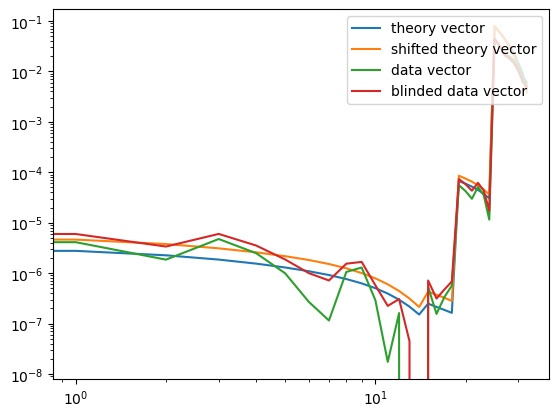

In [7]:
plt.figure()
plt.loglog(smkscr.theory_vec_fid, label='theory vector')
plt.loglog(smkscr.theory_vec_blind, label='shifted theory vector')
plt.loglog(smkscr.likelihood.get_data_vector(), label='data vector')
plt.loglog(blinded_dv, label='blinded data vector')
plt.legend(loc=1)
plt.show()

### Random shift withing a range $(\theta_{\rm min}, \theta_{\rm max})$

In [8]:
smkscr = ConcealDataVector(cosmo, syst_dict, des_y1_3x2pt_PT,
                           {'Omega_c': (0.22, 0.32), 'sigma8': (0.7, 0.9)},
                           sacc_data, **{'debug': True})

Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
[DEBUG] Shifts: {'Omega_c': 0.2479478911323865, 'sigma8': 0.7523342795879359}
[DEBUG] Blinded Cosmology: <pyccl.cosmology.Cosmology>
	Neff    = 3.044
	Omega_b = 0.045
	Omega_c = 0.2479478911323865
	h       = 0.67
	n_s     = 0.96
	sigma8  = 0.7523342795879359
	extra_parameters =
	HASH_ACCURACY_PARAMS = 0xe21501bbb461cd55


In [9]:
smkscr.calculate_blinding_factor()
blinded_dv = smkscr.apply_blinding_to_likelihood_datavec()

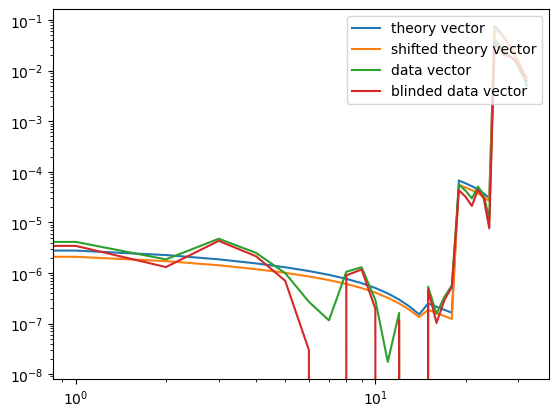

In [10]:
plt.figure()
plt.loglog(smkscr.theory_vec_fid, label='theory vector')
plt.loglog(smkscr.theory_vec_blind, label='shifted theory vector')
plt.loglog(smkscr.likelihood.get_data_vector(), label='data vector')
plt.loglog(blinded_dv, label='blinded data vector')
plt.legend(loc=1)
plt.show()

### Random shift around the fiducial value $(-\Delta\theta_{\rm min}, \Delta\theta_{\rm max})$

In [11]:
smkscr = ConcealDataVector(cosmo, syst_dict, des_y1_3x2pt_PT,
                          {'Omega_c': (-0.1, 0.1), 'sigma8': (-0.1, 0.1)},
                          sacc_data, **{'debug': True})

Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
[DEBUG] Shifts: {'Omega_c': 0.22589578226477303, 'sigma8': 0.7523342795879359}
[DEBUG] Blinded Cosmology: <pyccl.cosmology.Cosmology>
	Neff    = 3.044
	Omega_b = 0.045
	Omega_c = 0.22589578226477303
	h       = 0.67
	n_s     = 0.96
	sigma8  = 0.7523342795879359
	extra_parameters =
	HASH_ACCURACY_PARAMS = 0xe21501bbb461cd55


In [12]:
smkscr.calculate_blinding_factor()
blinded_dv = smkscr.apply_blinding_to_likelihood_datavec()

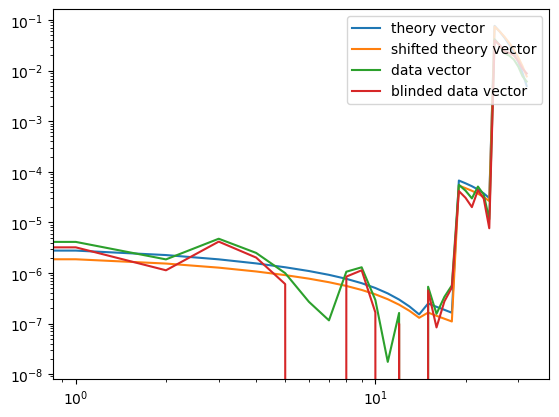

In [13]:
plt.figure()
plt.loglog(smkscr.theory_vec_fid, label='theory vector')
plt.loglog(smkscr.theory_vec_blind, label='shifted theory vector')
plt.loglog(smkscr.likelihood.get_data_vector(), label='data vector')
plt.loglog(blinded_dv, label='blinded data vector')
plt.legend(loc=1)
plt.show()